## Name: Batyrkhan Taldybayev
## Group: IT3-2203
## Date: 17.02.2025

---
## At this laboratory work, I took the Student Performance Factors dataset.
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("student.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Categorical columns needs to be coded

In [3]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Learning_Disabilities", "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type",
    "Peer_Influence", "Parental_Education_Level", "Distance_from_Home", "Gender"
]

le = LabelEncoder()
data[categorical_columns] = data[categorical_columns].apply(le.fit_transform)
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,68
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,68
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,68


---
## Preparing data for training

In [4]:
X = data.drop(columns=["Exam_Score"]).values
y = data["Exam_Score"].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

## <b>Multiple Linear Regression</b>

In [5]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros((n, 1))

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.theta)
            gradient = (1 / m) * np.dot(X.T, (y_pred - y))
            self.theta -= self.lr * gradient

    def predict(self, X):
        return np.dot(X, self.theta)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.730222387612899


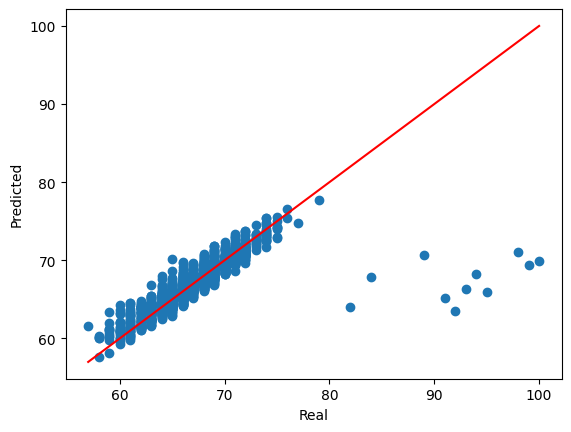

In [7]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()

---
## <b>Ridge Regression</b>

In [19]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)  # Можно изменить alpha для регуляризации
ridge_model.fit(X_train, y_train)

# Делаем предсказания
y_pred = ridge_model.predict(X_test)

# Оцениваем модель (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Ridge): {mse}")

Mean Squared Error (Ridge): 6.730392815255504


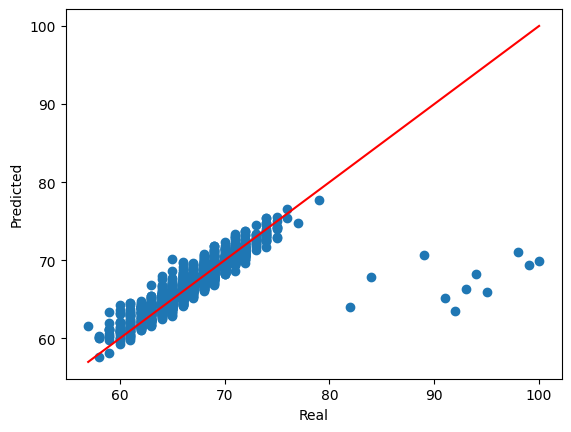

In [9]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()

---
## <b>Lasso Regression</b>

In [16]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Lasso): {mse}")

Mean Squared Error (Lasso): 6.900919232835333


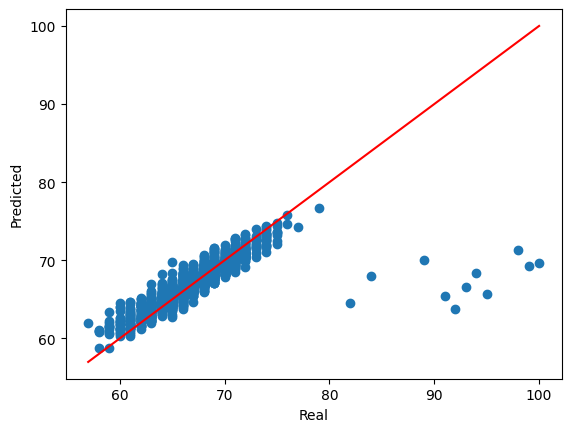

In [17]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()

---
## <b>Elasticnet Regression</b>

In [12]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Можно изменить alpha и l1_ratio для регуляризации
elasticnet_model.fit(X_train, y_train)

# Делаем предсказания
y_pred = elasticnet_model.predict(X_test)

# Оцениваем модель (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (ElasticNet): {mse}")

Mean Squared Error (ElasticNet): 6.857186744216936


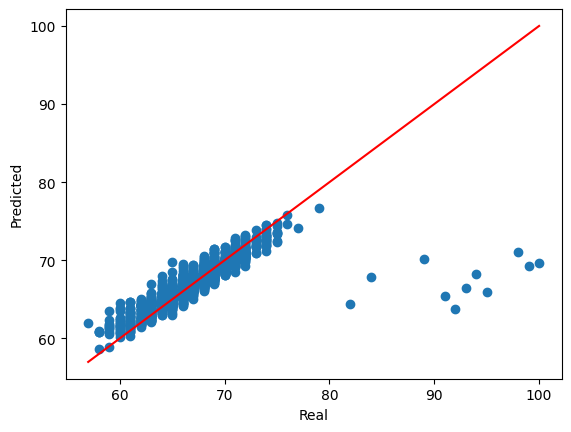

In [13]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()